<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/FinalProject/AI%EB%94%A5%EB%9F%AC%EB%8B%9D_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from collections import Counter
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [23]:
#문장을 단어로 분리
df_train['tokenized_text'] = df_train['text'].apply(word_tokenize)

In [24]:
#단어 등장 빈도수 계산
word_counts = FreqDist([word for sublist in df_train['tokenized_text'] for word in sublist])

In [25]:
#등장 빈도가 1인 단어 확인
infrequent_words = [word for word, count in word_counts.items() if count == 1]
infrequent_words

['ALLAH',
 'Forgive',
 'Ronge',
 'Sask',
 "'shelter",
 'notified',
 '13,000',
 'Ruby',
 'pours',
 '>',
 'directions',
 'CAfire',
 'Manitou',
 ',',
 'hah-',
 'WAIT',
 'SOUTH',
 'TAMPA',
 'FVCK',
 'TampaBay',
 'multi',
 'fruits',
 'goooooooaaaaaal',
 'skiing',
 'LOOOOOOL',
 'Cooool',
 'pasta',
 'bbcmtd',
 '//t.co/lHYXEOHY6C',
 '//t.co/YAo1e0xngw',
 'AFRICANBAZE',
 '//t.co/2nndBGwyEi',
 'Crying',
 'SKY',
 '//t.co/qqsmshaJ3N',
 'PhDSquares',
 'EPL',
 'Abia',
 '//t.co/3ImaomknnA',
 'Barbados',
 'Bridgetown',
 'JAMAICA',
 'Superintende',
 '//t.co/wDUEaj8Q4J',
 'visiting',
 'ancop',
 'Tita',
 'Vida',
 'SOOOO',
 'PUMPED',
 'southridgelife',
 'preaching',
 'hotel',
 '//t.co/o9qknbfOFX',
 'gained',
 '//t.co/TIyUliF5c6',
 '//t.co/vl5TBR3wbr',
 'tracklist',
 'retainers',
 '//t.co/gWNRhMSO8k',
 '//t.co/eV1ahOUCZA',
 'Superintendent',
 'Lanford',
 'Salmon',
 '//t.co/vplR5Hka2u',
 '//t.co/SxHW2TNNLf',
 'Deliberately',
 'CarolinaåÊAblaze',
 '//t.co/pcXarbH9An',
 'Noches',
 'El-Bestia',
 'Alexis_Sanche

In [26]:
#등장 빈도가 1인 단어를 포함하지 않는 텍스트 필터링
pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, infrequent_words)))
df_train_filtered = df_train[~df_train['text'].str.contains(pattern, regex=True)]

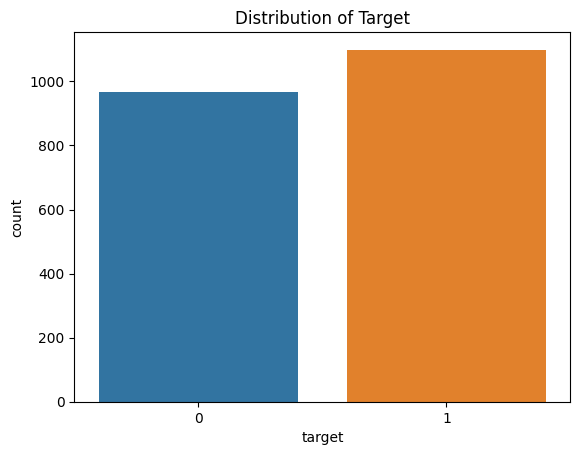

In [27]:
#재해 트윗과 비재해 트윗의 분포 확인 (필터링된 데이터)
sns.countplot(x='target', data=df_train_filtered)
plt.title('Distribution of Target')
plt.show()

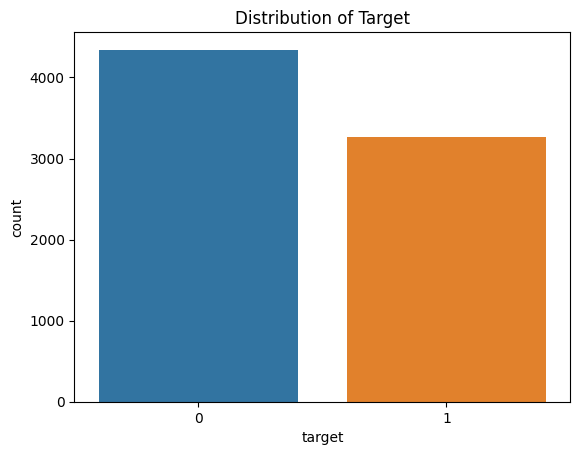

In [8]:
#재해 트윗과 비재해 트윗의 분포 확인 (원본 데이터)
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target')
plt.show()